<a href="https://colab.research.google.com/github/v5v5/StepikMLService/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%9A%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D1%8B_%D0%B0%D0%B2%D0%B8%D0%B0%D0%BA%D0%BE%D0%BC%D0%BF%D0%B0%D0%BD%D0%B8%D0%B8_0_ipynb-1%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/evgpat/edu_stepik_from_idea_to_mvp/main/datasets/clients.csv")

In [ ]:
# df.head(3)
# df.sample(3)
df.shape
# df.info()

(129880, 24)

In [ ]:
# df.describe()
# df.describe(include='object')
df.describe(include='all')

,id,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight wifi service,...,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
count,129880.000000,129549,129564.000000,129803,129779,129764,129786.000000,129773.000000,129371.000000,129835.000000,...,129834.000000,129832.000000,129833.000000,129836.000000,129834.000000,129832.000000,129838.000000,129817.00000,129843.000000,129880
unique,NaN,2,NaN,2,2,3,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,Female,NaN,Loyal Customer,Business travel,Business,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,neutral or dissatisfied
freq,NaN,65726,NaN,106040,89625,62103,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58879
mean,64940.500000,NaN,40.113951,NaN,NaN,NaN,1323.385804,15.811301,16.651406,2.732183,...,3.256674,3.445691,3.361395,3.387181,3.356101,3.636107,3.310056,3.64718,3.289865,NaN
std,37493.270818,NaN,20.365190,NaN,NaN,NaN,4516.191530,93.206139,109.167328,1.359786,...,1.381889,1.349732,1.366866,1.335540,1.361633,1.221818,1.298626,1.21837,1.347625,NaN
min,1.000000,NaN,0.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,NaN
25%,32470.750000,NaN,27.000000,NaN,NaN,NaN,414.000000,0.000000,0.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.00000,2.000000,NaN
50%,64940.500000,NaN,40.000000,NaN,NaN,NaN,846.000000,0.000000,0.000000,3.000000,...,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.00000,3.000000,NaN
75%,97410.250000,NaN,51.000000,NaN,NaN,NaN,1744.000000,12.000000,13.000000,4.000000,...,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.00000,4.000000,NaN


In [ ]:
df[['satisfaction']].describe(include='all')

,satisfaction
count,129880
unique,3
top,neutral or dissatisfied
freq,58879


Проверим значения целевой переменной

In [ ]:
df[['satisfaction']].value_counts(dropna=False)

satisfaction           
neutral or dissatisfied    58879
satisfied                  45025
-                          25976
dtype: int64

In [ ]:
df[['satisfaction']].value_counts(dropna=False, normalize=True)

satisfaction           
neutral or dissatisfied    0.453334
satisfied                  0.346666
-                          0.200000
dtype: float64

Неопределенных значений довольно много 20%. Но мы их все равно отбросим, т.к. невозможно интерпретировать эти значения и сделать выводы

In [ ]:
df = df[~df['satisfaction'].isin(['-'])]
df.shape

(103904, 24)

 Проверим на адекватность значения категориальных параметров Gender, Customer Type, Type of Travel, Class

In [ ]:
df[['Gender']].value_counts(dropna=False)

Gender
Female    52590
Male      51054
NaN         260
dtype: int64

In [ ]:
df[['Customer Type']].value_counts(dropna=False)

Customer Type    
Loyal Customer       84873
disloyal Customer    18965
NaN                     66
dtype: int64

In [ ]:
df[['Type of Travel']].value_counts(dropna=False)

Type of Travel 
Business travel    71596
Personal Travel    32220
NaN                   88
dtype: int64

In [ ]:
df[['Class']].value_counts(dropna=False)

Class   
Business    49615
Eco         46714
Eco Plus     7486
NaN            89
dtype: int64

Нарисуем гистограммы для параметров Age

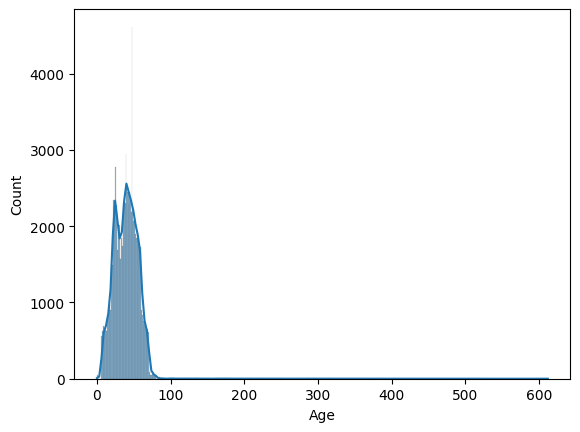

In [ ]:
sns.histplot(df['Age'], kde=True)
plt.show()


Замечаем, что есть возраст > 100 лет. Скорее всего - это выбросы. %-ое содержание таких выбросов = 0.3 - невелико => можно перенбречь выбросами при построении модели

In [ ]:
 len(df[df['Age'] > 100])/len(df)*100

0.3060517400677548

In [ ]:
age_ok = df['Age'].quantile(0.997)
age_ok

104.0

Нарисуем гистограммы для параметров Flight Distance

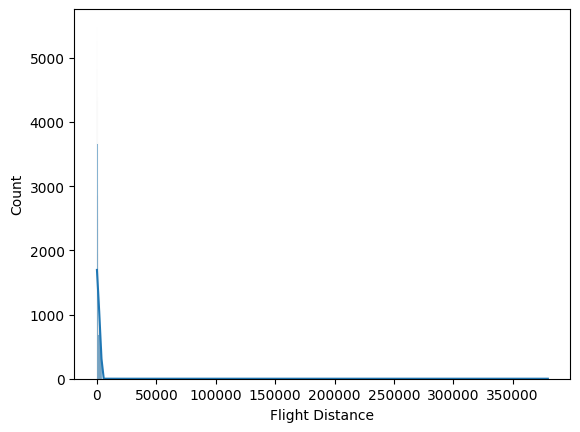

In [ ]:
sns.histplot(df['Flight Distance'], kde=True)
plt.show()

Замечаем, что есть дистанция > 24901 миль. Длина экватора 24 901 миль. Обзначим выбросами - дистанцию > 4000. %-ое содержание таких выбросов = 0.2% - невелико => можно перенбречь выбросами при построении модели

In [ ]:
 len(df[df['Flight Distance'] > 4000])/len(df)*100

0.23964428703418542

In [ ]:
distance_ok = df['Flight Distance'].quantile(0.998)
distance_ok

4817.0

Нарисуем гистограммы для параметров Departure Delay in Minutes

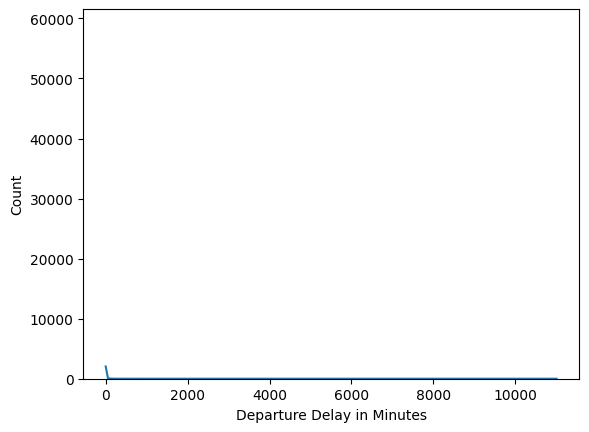

In [ ]:
sns.histplot(df['Departure Delay in Minutes'], kde=True)
plt.show()

Заметны выбросы, т.к. задержка вылета в 20000 минут = 333 часов невозможна

Замечаем, что есть время > 20000 часов. Это 333 часов - такая задержка невозможна. Обзначим выбросами - время > 300. %-ое содержание таких выбросов = 0.3% - невелико => можно перенбречь выбросами при построении модели

In [ ]:
 len(df[df['Departure Delay in Minutes'] > 300])/len(df)*100

0.2858407761010163

In [ ]:
departue_delay_ok = df['Departure Delay in Minutes'].quantile(0.998)
departue_delay_ok

334.0

Нарисуем гистограммы для параметров Arrival Delay in Minutes

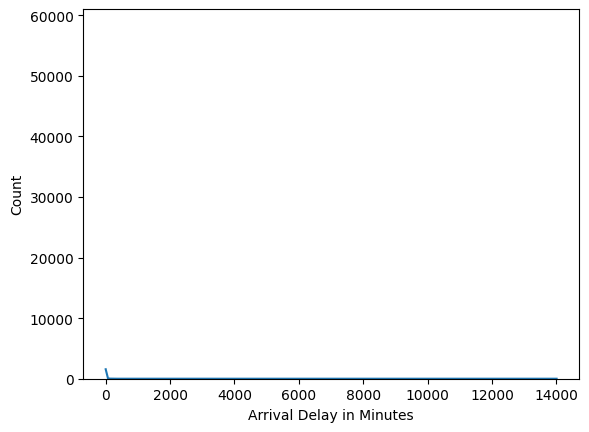

In [ ]:
sns.histplot(df['Arrival Delay in Minutes'], kde=True)
plt.show()

Замечаем, что есть время > 14000 часов. Это 233 часов - такая задержка невозможна. Обзначим выбросами - время > 300. %-ое содержание таких выбросов = 0.3% - невелико => можно перенбречь выбросами при построении модели

In [ ]:
 len(df[df['Arrival Delay in Minutes'] > 300])/len(df)*100

0.29835232522328303

In [ ]:
arrival_delay_ok = df['Arrival Delay in Minutes'].quantile(0.998)
arrival_delay_ok

346.8319999999949

Отфильтруем только допустимые значения
- Gender (categorical: Male или Female) - not nan
- Age (numeric, int) - < 100 & not nan
- Customer Type (categorical: Loyal Customer или disloyal Customer) - not nan
- Type of Travel (categorical: Business travel или Personal Travel) - not nan
- Class (categorical: Business или Eco, или Eco Plus) - not nan
- Flight Distance (numeric, int) - < 4000
- Departure Delay in Minutes (numeric, int) - < 300
- Arrival Delay in Minutes (numeric, int) - < 300

In [ ]:
df = df.dropna()
df.shape

(102085, 24)

Какие значения содержит признак Inflight wifi service?

In [ ]:
df[['Inflight wifi service']].value_counts(dropna=False)

Inflight wifi service
3.0                      25403
2.0                      25361
4.0                      19444
1.0                      17512
5.0                      11274
0.0                       3065
6.0                          6
21.0                         4
7.0                          3
16.0                         2
40.0                         2
12.0                         2
18.0                         1
20.0                         1
15.0                         1
25.0                         1
28.0                         1
10.0                         1
45.0                         1
dtype: int64

Содержит значения < 1 и > 5. Это неккоректные значения. Подсчитаем %-ое содержание этих выбросов.

In [ ]:
len(df[(df['Inflight wifi service'] < 1) | (df['Inflight wifi service'] > 5)])/len(df)*100

3.0278689327521184

%-ое содержание таких значений невелико. Поэтому выбросим их при построении модели

Проверим %-ое содержание некорректных значений для всех остальных оценок

In [ ]:
params = [
'Inflight wifi service',
'Departure/Arrival time convenient',
'Ease of Online booking',
'Gate location',
'Food and drink',
'Online boarding',
'Seat comfort',
'Inflight entertainment',
'On-board service',
'Leg room service',
'Baggage handling',
'Checkin service',
'Inflight service',
'Cleanliness'
]

for p in params:
  print(len(df[(df[p] < 1) | (df[p] > 5)])/len(df)*100)

3.0278689327521184
5.140814027526082
4.350296321692707
0.03134642699711025
0.12440613214478131
2.372532693343782
0.03134642699711025
0.03624430621540873
0.02938727530979086
0.4927266493608268
0.024489396091492383
0.035264730371749035
0.03624430621540873
0.035264730371749035


Процентное содержание некорректных значений невелико, поэтому отброим их при построении модели

- Можно заменить значения всех некорректных значений конкретных значений на 0.
- Потом сложить их все вместе

In [ ]:
for p in params:
  df[p] = np.where((df[p] < 1) | (df[p] > 5), 0, df[p])

<ipython-input-122-a4d92a8480ee>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[p] = np.where((df[p] < 1) | (df[p] > 5), 0, df[p])


In [ ]:
for p in params:
  df[p].fillna(0, inplace=True)

<ipython-input-123-418d393aefaa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[p].fillna(0, inplace=True)


In [ ]:
for p in params:
  print(df[p].value_counts(dropna=False))

3.0    25403
2.0    25361
4.0    19444
1.0    17512
5.0    11274
0.0     3091
Name: Inflight wifi service, dtype: int64
4.0    25099
5.0    22019
3.0    17647
2.0    16867
1.0    15205
0.0     5248
Name: Departure/Arrival time convenient, dtype: int64
3.0    24005
2.0    23610
4.0    19218
1.0    17176
5.0    13635
0.0     4441
Name: Ease of Online booking, dtype: int64
3.0    28048
4.0    24028
2.0    19095
1.0    17229
5.0    13653
0.0       32
Name: Gate location, dtype: int64
4.0    23941
3.0    21922
5.0    21895
2.0    21600
1.0    12600
0.0      127
Name: Food and drink, dtype: int64
4.0    30204
3.0    21425
5.0    20345
2.0    17195
1.0    10494
0.0     2422
Name: Online boarding, dtype: int64
4.0    31224
5.0    25992
3.0    18367
2.0    14629
1.0    11841
0.0       32
Name: Seat comfort, dtype: int64
4.0    28903
5.0    24777
3.0    18802
2.0    17322
1.0    12244
0.0       37
Name: Inflight entertainment, dtype: int64
4.0    30322
5.0    23231
3.0    22430
2.0    14408
1.0 

Подсчитаем сумму специфичных оценок

In [ ]:
df['sum'] = df[params].sum(axis=1)
df['sum']

0         54.0
1         53.0
2         55.0
3         53.0
4         49.0
          ... 
129873    47.0
129874    50.0
129877    44.0
129878    52.0
129879    35.0
Name: sum, Length: 102085, dtype: float64

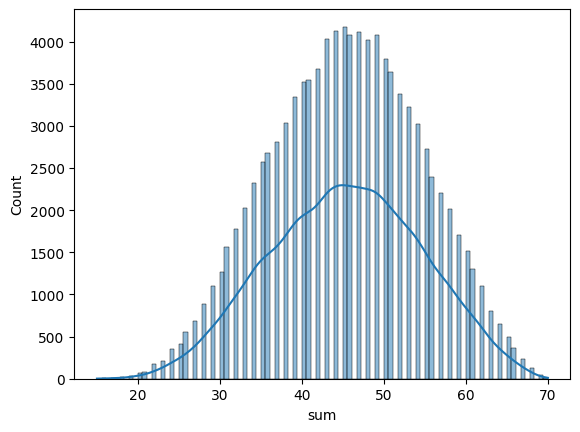

In [ ]:
sns.histplot(df['sum'], kde=True)
plt.show()

Преобразовать категроиальные признаки с помощью onehotencoding
- Gender
- Customer Type
- Type of Travel
- Class

In [ ]:
gender = pd.get_dummies(df['Gender'], prefix='Gender')

In [ ]:
new_df = pd.concat([df, gender], axis=1)
new_df[['Gender', 'Gender_Male', 'Gender_Female']]

,Gender,Gender_Male,Gender_Female
0,Male,1,0
1,Female,0,1
2,Male,1,0
3,Male,1,0
4,Female,0,1
...,...,...,...
129873,Female,0,1
129874,Female,0,1
129877,Male,1,0
129878,Male,1,0


In [ ]:
customer_type = pd.get_dummies(df['Customer Type'], prefix='Customer Type')
customer_type

,Customer Type_Loyal Customer,Customer Type_disloyal Customer
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
129873,1,0
129874,1,0
129877,1,0
129878,1,0


In [ ]:
new_df = pd.concat([new_df, customer_type], axis = 1)
new_df[['Customer Type_Loyal Customer', 'Customer Type_disloyal Customer']]


,Customer Type_Loyal Customer,Customer Type_disloyal Customer
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
129873,1,0
129874,1,0
129877,1,0
129878,1,0


In [ ]:
type_of_travel = pd.get_dummies(df['Type of Travel'], prefix='Type of Travel')
type_of_travel

,Type of Travel_Business travel,Type of Travel_Personal Travel
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
129873,0,1
129874,0,1
129877,0,1
129878,0,1


In [ ]:
new_df = pd.concat([new_df, type_of_travel], axis = 1)
new_df[['Type of Travel_Business travel', 'Type of Travel_Personal Travel']]


,Type of Travel_Business travel,Type of Travel_Personal Travel
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
129873,0,1
129874,0,1
129877,0,1
129878,0,1


In [ ]:
type_of_class = pd.get_dummies(df['Class'], prefix='Class')
type_of_class


,Class_Business,Class_Eco,Class_Eco Plus
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
129873,0,0,1
129874,0,0,1
129877,0,0,1
129878,0,0,1


In [ ]:
new_df = pd.concat([new_df, type_of_class], axis = 1)
new_df[['Class_Business', 'Class_Eco', 'Class_Eco Plus']]


,Class_Business,Class_Eco,Class_Eco Plus
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
129873,0,0,1
129874,0,0,1
129877,0,0,1
129878,0,0,1


In [ ]:
new_df

,id,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight wifi service,...,sum,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,1,Male,48.0,disloyal Customer,Business travel,Business,821.0,2.0,5.0,3.0,...,54.0,0,1,0,1,1,0,1,0,0
1,2,Female,35.0,Loyal Customer,Business travel,Business,821.0,26.0,39.0,2.0,...,53.0,1,0,1,0,1,0,1,0,0
2,3,Male,41.0,Loyal Customer,Business travel,Business,853.0,0.0,0.0,4.0,...,55.0,0,1,1,0,1,0,1,0,0
3,4,Male,50.0,Loyal Customer,Business travel,Business,1905.0,0.0,0.0,2.0,...,53.0,0,1,1,0,1,0,1,0,0
4,5,Female,49.0,Loyal Customer,Business travel,Business,3470.0,0.0,1.0,3.0,...,49.0,1,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129873,129874,Female,28.0,Loyal Customer,Personal Travel,Eco Plus,337.0,0.0,0.0,4.0,...,47.0,1,0,1,0,0,1,0,0,1
129874,129875,Female,55.0,Loyal Customer,Personal Travel,Eco Plus,308.0,0.0,0.0,3.0,...,50.0,1,0,1,0,0,1,0,0,1
129877,129878,Male,42.0,Loyal Customer,Personal Travel,Eco Plus,337.0,6.0,14.0,2.0,...,44.0,0,1,1,0,0,1,0,0,1
129878,129879,Male,50.0,Loyal Customer,Personal Travel,Eco Plus,337.0,31.0,22.0,5.0,...,52.0,0,1,1,0,0,1,0,0,1


In [ ]:
remove_columns = [
    'Gender',
    'Customer Type',
    'Type of Travel',
    'Class',
    'Inflight wifi service',
    'Departure/Arrival time convenient',
    'Ease of Online booking',
    'Gate location',
    'Food and drink',
    'Online boarding',
    'Seat comfort',
    'Inflight entertainment',
    'On-board service',
    'Leg room service',
    'Baggage handling',
    'Checkin service',
    'Inflight service',
    'Cleanliness',
    'satisfaction',
    'sum'
]
X = new_df.drop(remove_columns, axis = 1)
y = new_df['satisfaction']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train.shape, X_test.shape

((76563, 14), (25522, 14))

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train, y_train)

pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, pred)

array([[10912,  3504],
       [ 6447,  4659]])

In [ ]:
y_test.value_counts()

neutral or dissatisfied    14416
satisfied                  11106
Name: satisfaction, dtype: int64